In [6]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats




### Fixed Cost of each WTP

In [7]:
fixed_cost = pd.read_excel("../dataset/fixed_cost.xlsx", index_col=0)
fixed_cost.head()

,Low,High
WTP,,
Ampang Intake,6500.0,9500.0
Batang Kali,4980.0,7270.0
Bernam River Head,6230.0,9100.0
WTP1,NaN,NaN
WTP2,NaN,NaN


In [8]:
WTP = fixed_cost.index

In [9]:
"{:03d}".format(4)

'004'

In [10]:
DMZ = np.array(["DMZ"+ "{:03d}".format(x) for x in range(1, 2501)])

In [11]:
DMZ

array(['DMZ001', 'DMZ002', 'DMZ003', ..., 'DMZ2498', 'DMZ2499', 'DMZ2500'],
      dtype='<U7')

In [32]:
len(DMZ)

2500

In [12]:
fixed_cost["Fixed Cost"] = np.random.randint(low=4000, high=12000, size=len(fixed_cost.index))

In [13]:
fixed_cost = fixed_cost.drop(["Low", "High"], axis=1)

In [14]:
# fixed_cost.to_excel("../dataset2/fixed_cost.xlsx", index=True)
fixed_cost = pd.read_excel("../dataset2/fixed_cost.xlsx")

Text(0.5, 1.0, 'Distribution of WTP Fixed Cost')

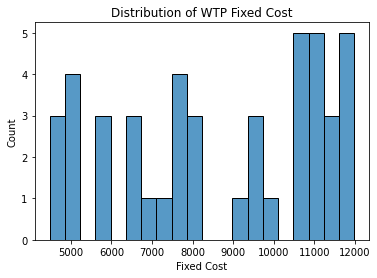

In [15]:
sns.histplot(x="Fixed Cost", data=fixed_cost, bins=20)
plt.title("Distribution of WTP Fixed Cost")

### Capacity of each WTP

In [14]:
capacity = pd.read_excel("../dataset/capacity.xlsx", index_col=0)
capacity.head()

,Capacity
WTP,
Ampang Intake,2000000
Batang Kali,2000000
Bernam River Head,2000000
Wangsa Maju,2000000
Sungai Tengi,2000000


In [24]:
# # With uniform distribution
# wtp_capacity = np.random.randint(low = 1750000, high=4000000, size=len(WTP))
# new_capacity = pd.DataFrame({"Capacity": wtp_capacity}, index=WTP)

In [45]:
# With norm distribution
lower, upper = 17500000, 40000000
mu, sigma = 28000000, 1000000
capacity_generator = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc = mu, scale=sigma, 
)
capacity= capacity_generator.rvs(size=len(WTP))
new_capacity = pd.DataFrame({"Capacity": capacity}, index=WTP)
new_capacity = new_capacity.round(5)

In [47]:
# new_capacity.to_excel("../dataset2/capacity.xlsx")
new_capacity = pd.read_excel("../dataset2/capacity.xlsx")

/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capacity', ylabel='Density'>

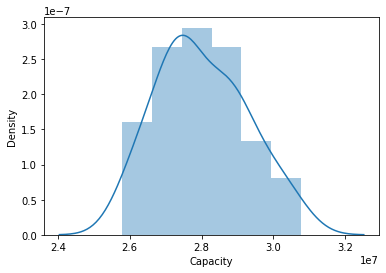

In [48]:
sns.distplot(new_capacity["Capacity"])

Text(0.5, 1.0, 'Distribution of WTP Capacity')

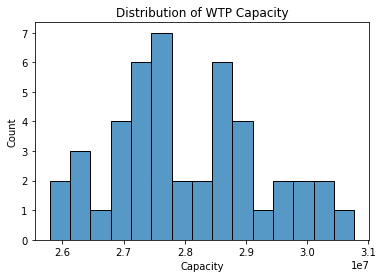

In [49]:
sns.histplot(new_capacity["Capacity"], bins = 15)
plt.title("Distribution of WTP Capacity")

### Distribution Loss

In [ ]:
distribution_loss = pd.read_excel("../dataset/distribution_loss.xlsx", index_col=0)
distribution_loss

,Ampang Intake,Batang Kali,Bernam River Head,Wangsa Maju,Sungai Tengi
Distribution Loss,,,,,
DMZ1,0.25,0.21,0.28,0.30,0.29
DMZ2,0.27,0.35,0.30,0.26,0.25
DMZ3,0.28,0.29,0.25,0.26,0.31
DMZ4,0.25,0.29,0.27,0.24,0.34
DMZ5,0.28,0.32,0.34,0.23,0.26


In [22]:
lower, upper = 0.23, 0.36
mu, sigma = 0.30, 0.035
loss_generator = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc = mu, scale=sigma, 
)
loss = loss_generator.rvs(size=(len(DMZ), len(WTP)))

In [23]:
new_distribution_loss = pd.DataFrame(loss,columns=WTP, index=DMZ)
new_distribution_loss = new_distribution_loss.round(5)

In [24]:
temp = np.array(loss)
water_loss = temp.flatten()

<AxesSubplot:ylabel='Count'>

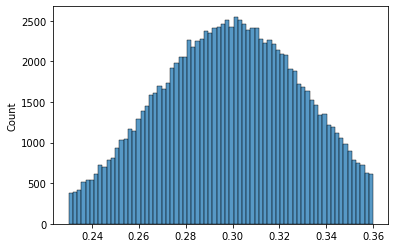

In [25]:
sns.histplot(water_loss)

In [26]:
new_distribution_loss

WTP,Ampang Intake,Batang Kali,Bernam River Head,WTP1,WTP2,WTP3,WTP4,WTP5,WTP6,WTP7,...,WTP33,WTP34,WTP35,WTP36,WTP37,WTP38,WTP39,WTP40,Wangsa Maju,Sungai Tengi
DMZ001,0.31838,0.34819,0.23241,0.26049,0.34462,0.28837,0.30351,0.28379,0.33333,0.30272,...,0.29068,0.28830,0.29829,0.35956,0.26697,0.30082,0.27045,0.28345,0.27237,0.33081
DMZ002,0.30544,0.32145,0.29041,0.26520,0.30354,0.25078,0.31171,0.26908,0.24993,0.34083,...,0.31445,0.24484,0.35810,0.34966,0.31344,0.25027,0.29574,0.27309,0.32620,0.30501
DMZ003,0.32782,0.29775,0.30906,0.33927,0.31701,0.29337,0.26027,0.31059,0.30448,0.32909,...,0.24614,0.32459,0.23055,0.31726,0.31519,0.31940,0.29601,0.28883,0.33544,0.26115
DMZ004,0.35452,0.28941,0.25286,0.30884,0.32873,0.27913,0.26008,0.33860,0.32277,0.28385,...,0.32659,0.26638,0.28412,0.34979,0.26636,0.28850,0.28361,0.29359,0.25466,0.26176
DMZ005,0.28498,0.28067,0.29266,0.32907,0.29612,0.33973,0.24868,0.34067,0.25028,0.28086,...,0.31274,0.31326,0.29827,0.27726,0.29009,0.23659,0.27612,0.35060,0.32065,0.27252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMZ2496,0.32587,0.31135,0.27803,0.33575,0.28533,0.27766,0.31079,0.33468,0.30421,0.31971,...,0.23683,0.30335,0.24588,0.29591,0.32876,0.30069,0.27753,0.33527,0.29623,0.32385
DMZ2497,0.34633,0.35406,0.34739,0.29061,0.26348,0.29627,0.27375,0.27372,0.25699,0.29173,...,0.29204,0.31244,0.25958,0.31839,0.31074,0.30234,0.31748,0.28095,0.28627,0.31974
DMZ2498,0.23256,0.25978,0.33842,0.29846,0.35101,0.30870,0.27525,0.24196,0.28481,0.32234,...,0.27337,0.24448,0.31338,0.23119,0.30689,0.30583,0.28096,0.33882,0.30623,0.30570
DMZ2499,0.28521,0.30273,0.31253,0.29511,0.32688,0.31159,0.30465,0.25456,0.34442,0.27298,...,0.30900,0.30869,0.31664,0.24972,0.25593,0.24856,0.32164,0.27273,0.24755,0.27697


In [27]:
# Exporting
# new_distribution_loss.to_excel("../dataset2/distribution_loss.xlsx")

# Importing
new_distribution_loss = pd.read_excel("../dataset2/distribution_loss.xlsx", index_col=0)

<AxesSubplot:ylabel='Count'>

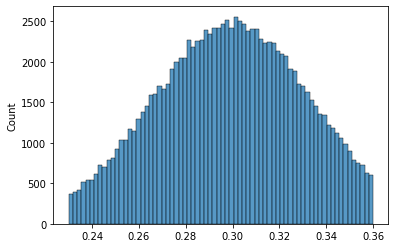

In [28]:
temp=new_distribution_loss.values
# temp = loss
# temp = np.array(loss)
water_loss = temp.flatten()
sns.histplot(water_loss)

### Links between WTP and DMZ

In [ ]:
linkage = pd.read_excel("../dataset/linkage.xlsx", index_col=0)
linkage

,Ampang Intake,Batang Kali,Bernam River Head,Wangsa Maju,Sungai Tengi
Links,,,,,
DMZ1,1,1,0,1,1
DMZ2,0,1,0,1,1
DMZ3,1,0,1,1,0
DMZ4,0,0,1,0,1
DMZ5,0,1,0,1,1


In [50]:
connection = np.random.choice([0, 1], size=(len(DMZ), len(WTP)), p=[0.1, 0.9])

In [51]:
new_linkage = pd.DataFrame(connection, columns=WTP, index=DMZ)

In [52]:
# Exporting
new_linkage.to_excel("../dataset2/linkage2.xlsx")


# Importing
new_linkage = pd.read_excel("../dataset2/linkage2.xlsx", index_col=0)

/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar Chart of Linkages')

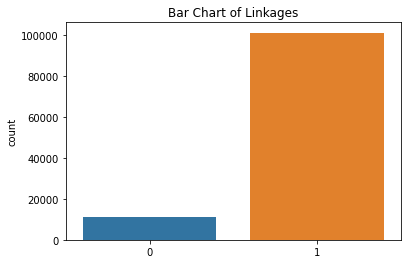

In [53]:
temp=new_linkage.values
# temp = loss
# temp = np.array(loss)
temp = temp.flatten()
sns.countplot(temp)
plt.title("Bar Chart of Linkages")

### Variable Cost for each combination of (DMZ, WTP)

In [ ]:
variable_cost = pd.read_excel("../dataset/variable_costs.xlsx", index_col=0)
variable_cost.head()

,Ampang Intake,Batang Kali,Bernam River Head,Wangsa Maju,Sungai Tengi
Variable Costs,,,,,
DMZ1,12,12,12,12,12
DMZ2,13,13,13,13,13
DMZ3,10,10,10,10,10
DMZ4,8,8,8,8,8
DMZ5,5,5,5,5,5


In [33]:
vc =np.random.randint(low=5, high=25, size=(len(DMZ), len(WTP)))

In [34]:
new_variable_cost = pd.DataFrame(vc,columns=WTP, index=DMZ)

In [35]:
new_variable_cost

WTP,Ampang Intake,Batang Kali,Bernam River Head,WTP1,WTP2,WTP3,WTP4,WTP5,WTP6,WTP7,...,WTP33,WTP34,WTP35,WTP36,WTP37,WTP38,WTP39,WTP40,Wangsa Maju,Sungai Tengi
DMZ001,9,14,9,12,24,13,21,20,8,10,...,21,23,11,9,17,7,19,18,5,22
DMZ002,12,15,23,11,18,23,17,7,7,22,...,9,9,10,23,13,18,9,15,9,11
DMZ003,5,20,19,8,9,17,7,12,18,9,...,21,21,19,15,15,5,6,16,11,21
DMZ004,22,14,15,6,12,8,9,19,17,11,...,15,9,9,24,20,8,19,13,15,5
DMZ005,22,10,7,21,22,12,21,20,9,18,...,8,14,18,23,20,14,7,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMZ2496,9,20,22,21,10,18,8,17,9,22,...,19,8,16,21,8,20,14,21,18,8
DMZ2497,17,16,9,17,24,15,16,7,7,14,...,16,17,7,16,11,13,19,12,13,23
DMZ2498,22,16,5,23,17,17,12,14,17,5,...,14,7,6,19,16,12,15,12,11,13
DMZ2499,13,20,21,6,21,17,14,18,10,21,...,21,22,6,19,14,20,15,22,20,18


In [36]:
# Exporting
# new_variable_cost.to_excel("../dataset2/variable_costs.xlsx")

# Importing
new_variable_cost = pd.read_excel("../dataset2/variable_costs.xlsx", index_col=0)


Text(0.5, 1.0, 'Distribution of Variable Cost')

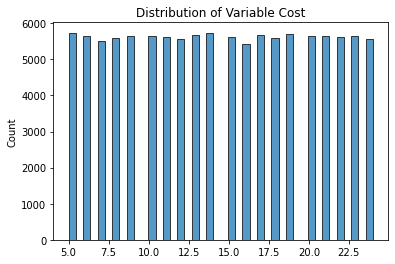

In [37]:
temp=new_variable_cost.values
# temp = loss
# temp = np.array(loss)
temp = temp.flatten()
sns.histplot(temp)
plt.title("Distribution of Variable Cost")

### Transport Cost for each combination of (DMZ, WTP)

In [ ]:
transport_cost = pd.read_excel("../dataset/freight_costs.xlsx", index_col=0)
transport_cost.head()

,Ampang Intake,Batang Kali,Bernam River Head,Wangsa Maju,Sungai Tengi
Freight Costs ($/Container),,,,,
DMZ1,0,12250,1100,16100,8778
DMZ2,13335,0,8617,20244,10073
DMZ3,15400,22750,0,43610,14350
DMZ4,16450,22050,28000,0,29750
DMZ5,13650,15400,24500,29400,0


### Demand for each DMZ

In [ ]:
demand = pd.read_excel("../dataset/demand.xlsx", index_col=0)
demand.head()

,Demand
DMZ,
DMZ1,2800000
DMZ2,90000
DMZ3,1700000
DMZ4,145000
DMZ5,160000


In [ ]:
demand["Demand"] = pd.to_numeric(demand["Demand"], downcast="float")
demand.head()

,Demand
DMZ,
DMZ1,2800000.0
DMZ2,90000.0
DMZ3,1700000.0
DMZ4,145000.0
DMZ5,160000.0


In [150]:
np.random.chisquare(df=10, size=10)

array([ 4.70144032,  2.59151459,  6.33602699, 11.64215825,  7.7387402 ,
        7.69023003, 21.45025225, 11.28000346, 13.07512943,  7.22602526])

In [162]:
alpha = 2
beta = 10

demand = np.random.beta(alpha, beta, 1000)

mean = alpha / (alpha+beta) 
print(mean)


0.16666666666666666


In [190]:
df = 8
loc=100000
scale=10000
mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk', loc=loc, scale=scale)

print(mean, var, skew, kurt)

180000.0 1600000000.0 1.0 1.5


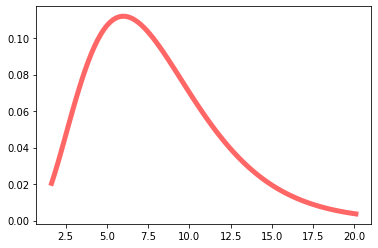

In [198]:
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)

plt.plot(x, stats.chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

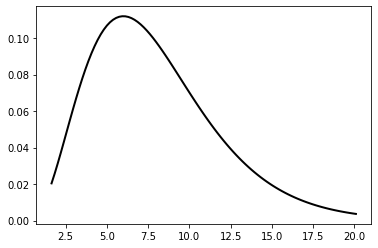

In [182]:
rv = stats.chi2(df)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

165000.0 800000000.0 1.4142135623730951 3.0


/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


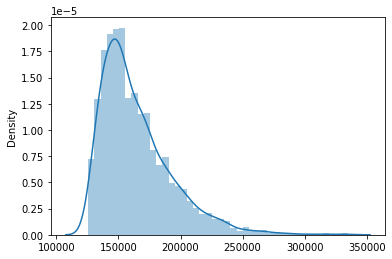

In [38]:
# Using Chi-squared distribution

df = 4
loc=125000
scale=10000

demand= stats.chi2.rvs(df, size=len(DMZ), loc=loc, scale=scale)

temp = np.array(demand).flatten()
sns.distplot(temp)

mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk', loc=loc, scale=scale)

print(mean, var, skew, kurt)

In [39]:
# new_demand = pd.DataFrame(demand, index=DMZ, columns=["Demand"])
# new_demand = new_demand.round(5)

# # Exporting
# new_demand.to_excel("../dataset2/demand_chisq.xlsx")


161941.76058678058 82394354.08801413 0.9772874682383684 0.8482995754166126


/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


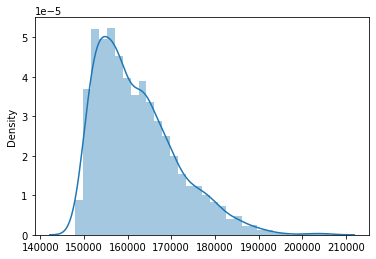

In [40]:
# Using Skew norm

a = 15
loc=150000
scale=15000

demand= stats.skewnorm.rvs(a, size=len(DMZ), loc=loc, scale=scale)

temp = np.array(demand).flatten()
sns.distplot(temp)

mean, var, skew, kurt =  stats.skewnorm.stats(a, moments='mvsk', loc=loc, scale=scale)

print(mean, var, skew, kurt)

In [41]:
# new_demand = pd.DataFrame(demand, index=DMZ, columns=["Demand"])
# new_demand = new_demand.round(5)

# # Exporting
# new_demand.to_excel("../dataset2/demand_skewnorm.xlsx")

In [42]:
# Importing
new_demand = pd.read_excel("../dataset2/demand_chisq.xlsx", index_col=0)
# new_demand = pd.read_excel("../dataset2/demand_skewnorm.xlsx")


/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

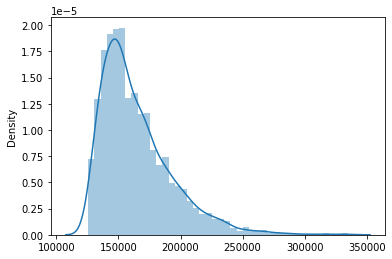

In [43]:
temp = new_demand.values
temp = temp.flatten()
sns.distplot(temp)